In [7]:

import pandas as pd
import plotly.express as px
import prophet
import numpy as np
import matplotlib.pyplot as plt
apple_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\appl_data.csv")


In [8]:

columns = ['Date', 'Close']
apple_second = pd.DataFrame(apple_data, columns=columns)
apple_second['Date'] = pd.to_datetime(apple_data['Date'])

In [10]:

prophet_df = apple_second.rename(columns={'Date': 'ds', 'Close': 'y'})

In [11]:

cutoff_date = pd.to_datetime('2023-12-29')
train_data = prophet_df[prophet_df['ds'] <= cutoff_date]
test_data = prophet_df[prophet_df['ds'] > cutoff_date]

In [12]:

model = prophet.Prophet()
model.fit(train_data)

22:01:31 - cmdstanpy - INFO - Chain [1] start processing
22:01:32 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=100)
forecast = model.predict(future)

In [14]:
forecast.tail(57)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1049,2024-02-11,199.312165,193.712921,212.574512,198.018849,201.053461,3.998681,3.998681,3.998681,-0.100731,-0.100731,-0.100731,4.099412,4.099412,4.099412,0.0,0.0,0.0,203.310846
1050,2024-02-12,199.428414,195.029606,212.480329,198.085752,201.251521,4.033330,4.033330,4.033330,0.184659,0.184659,0.184659,3.848671,3.848671,3.848671,0.0,0.0,0.0,203.461745
1051,2024-02-13,199.544664,194.583261,212.304089,198.101872,201.491587,3.583601,3.583601,3.583601,0.047453,0.047453,0.047453,3.536148,3.536148,3.536148,0.0,0.0,0.0,203.128264
1052,2024-02-14,199.660913,194.698445,212.043104,198.133912,201.710286,3.301558,3.301558,3.301558,0.136794,0.136794,0.136794,3.164765,3.164765,3.164765,0.0,0.0,0.0,202.962472
1053,2024-02-15,199.777163,193.809752,212.436037,198.197348,201.903393,2.689758,2.689758,2.689758,-0.048586,-0.048586,-0.048586,2.738344,2.738344,2.738344,0.0,0.0,0.0,202.466921
1054,2024-02-16,199.893412,193.349268,211.332607,198.256212,202.134602,2.142680,2.142680,2.142680,-0.118859,-0.118859,-0.118859,2.261539,2.261539,2.261539,0.0,0.0,0.0,202.036092
1055,2024-02-17,200.009662,192.765846,210.982487,198.297278,202.335218,1.639028,1.639028,1.639028,-0.100730,-0.100730,-0.100730,1.739759,1.739759,1.739759,0.0,0.0,0.0,201.648690
1056,2024-02-18,200.125911,192.418351,210.226519,198.346473,202.529412,1.078336,1.078336,1.078336,-0.100731,-0.100731,-0.100731,1.179067,1.179067,1.179067,0.0,0.0,0.0,201.204247
1057,2024-02-19,200.242161,192.306001,209.764433,198.423687,202.723454,0.770738,0.770738,0.770738,0.184659,0.184659,0.184659,0.586079,0.586079,0.586079,0.0,0.0,0.0,201.012899
1058,2024-02-20,200.358410,191.046805,209.234368,198.486671,202.930085,0.015304,0.015304,0.015304,0.047453,0.047453,0.047453,-0.032149,-0.032149,-0.032149,0.0,0.0,0.0,200.373714


C:\Users\agnes\anaconda3\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\agnes\anaconda3\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



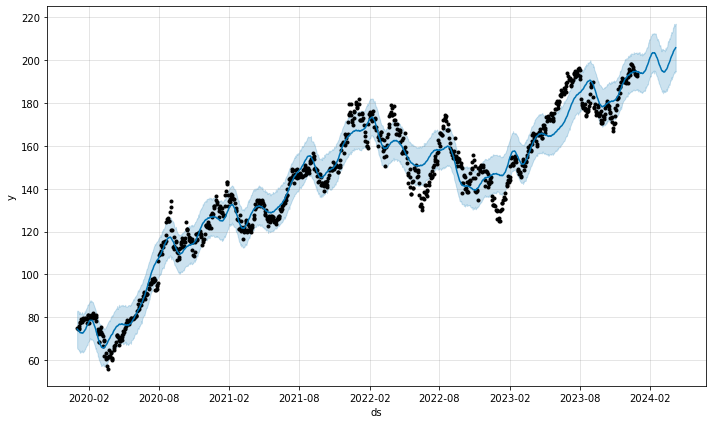

In [15]:
px.line(forecast, x='ds', y='yhat')
figure = model.plot(forecast, xlabel='ds', ylabel='y')

C:\Users\agnes\anaconda3\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\agnes\anaconda3\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\agnes\anaconda3\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



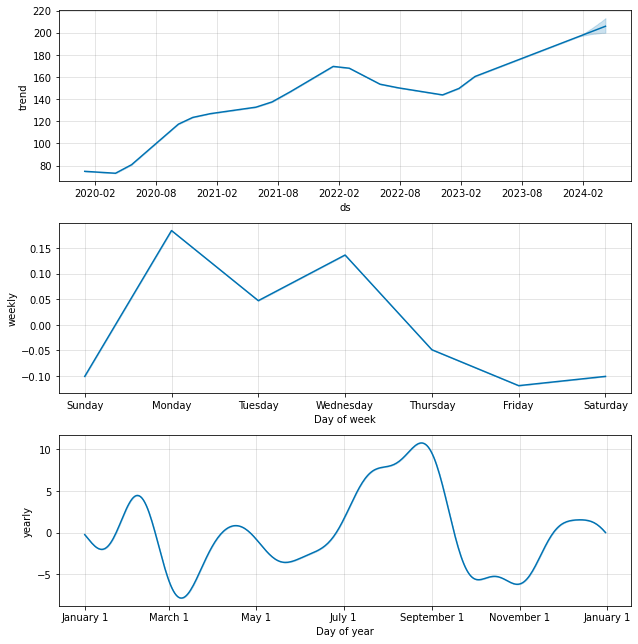

In [16]:
figure2 = model.plot_components(forecast)

In [17]:

forecast.to_csv('forecast.csv')

In [18]:
## Creating bollinger bands using dataframe
def bollinger_bands(df, n, m):
    data = df['yhat']
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std()
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)    
    return df

In [19]:
def add_signal(df):
    buy_list = []
    sell_list = []
    for i in range(len(df['yhat'])):
        if df['yhat'][i] > df['BU'][i]:           # sell signal     daily
            buy_list.append(np.nan)
            sell_list.append(df['yhat'][i])
        elif df['yhat'][i] < df['BL'][i]:         # buy signal      daily
            buy_list.append(df['yhat'][i])
            sell_list.append(np.nan)  
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
         
    buy_list = pd.Series(buy_list, name='Buy')
    sell_list = pd.Series(sell_list, name='Sell')
        
    df = df.join(buy_list)
    df = df.join(sell_list)        
     
    return df

In [20]:

df = bollinger_bands(forecast, 20, 2)
dfa = add_signal(df)
dfa

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,B_MA,BU,BL,Buy,Sell
0,2020-01-02,74.851109,65.790396,82.890438,74.851109,74.851109,-0.344442,-0.344442,-0.344442,-0.048586,...,-0.295856,0.0,0.0,0.0,74.506667,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,74.832303,65.296010,83.148136,74.832303,74.832303,-0.625130,-0.625130,-0.625130,-0.118859,...,-0.506271,0.0,0.0,0.0,74.207172,NaN,NaN,NaN,NaN,NaN
2,2020-01-06,74.775883,64.883749,82.751992,74.775883,74.775883,-0.943368,-0.943368,-0.943368,0.184659,...,-1.128027,0.0,0.0,0.0,73.832515,NaN,NaN,NaN,NaN,NaN
3,2020-01-07,74.757077,64.177190,81.539630,74.757077,74.757077,-1.271689,-1.271689,-1.271689,0.047453,...,-1.319142,0.0,0.0,0.0,73.485388,NaN,NaN,NaN,NaN,NaN
4,2020-01-08,74.738270,64.578183,82.268817,74.738270,74.738270,-1.358491,-1.358491,-1.358491,0.136794,...,-1.495285,0.0,0.0,0.0,73.379779,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,2024-04-03,205.357140,194.562568,216.880634,199.884487,212.200915,-0.663849,-0.663849,-0.663849,0.136794,...,-0.800643,0.0,0.0,0.0,204.693291,200.357530,205.882663,194.832396,NaN,NaN
1102,2024-04-04,205.473390,194.011446,215.957496,199.879191,212.421871,-0.611695,-0.611695,-0.611695,-0.048586,...,-0.563110,0.0,0.0,0.0,204.861694,200.804196,206.265709,195.342683,NaN,NaN
1103,2024-04-05,205.589639,194.557811,216.488261,199.936053,212.645153,-0.462870,-0.462870,-0.462870,-0.118859,...,-0.344011,0.0,0.0,0.0,205.126769,201.244057,206.604265,195.883850,NaN,NaN
1104,2024-04-06,205.705889,194.876439,216.627192,199.983093,212.897662,-0.244245,-0.244245,-0.244245,-0.100730,...,-0.143515,0.0,0.0,0.0,205.461643,201.680086,206.915288,196.444883,NaN,NaN


In [21]:
def plot_signals(df, ticker):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(df['ds'], df['yhat'])
    plt.title('Price chart (Close) ' + str(ticker))
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('Bollinger Bands chart ' + str(ticker))
    plt.plot(df['ds'], df['yhat'], label='yhat')

    plt.plot(df['ds'], df['BU'], label='B_Upper', alpha=0.3)
    plt.plot(df['ds'], df['BL'], label='B_Lower', alpha=0.3)
    plt.plot(df['ds'], df['B_MA'], label='B_SMA', alpha=0.3)
    plt.fill_between(df['ds'], df['BU'], df['BL'], color='grey', alpha=0.1)

    plt.scatter(df['ds'], df['Buy'], label='Buy', marker='^')
    plt.scatter(df['ds'], df['Sell'], label='Sell', marker='v')

    plt.legend()

    plt.show()

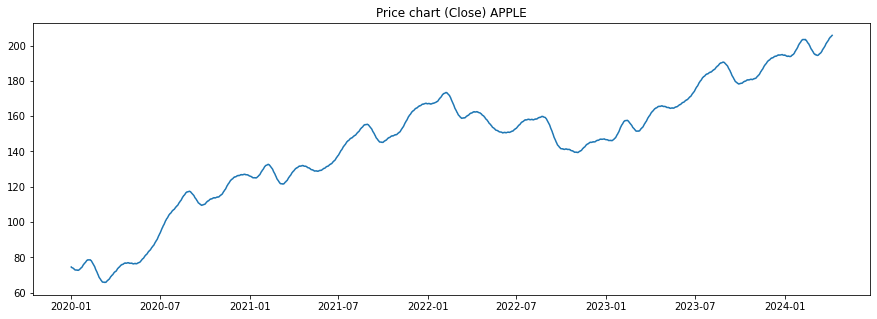

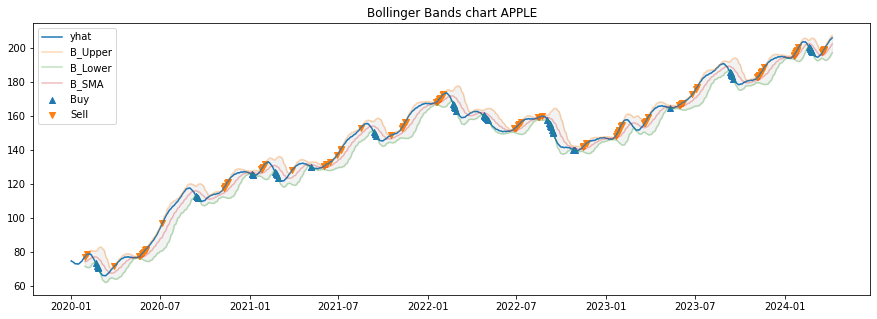

In [23]:
plot_signals(dfa, 'APPLE')

In [24]:
def get_profit(df, investment):
    n_of_buys = 0
    n_of_sells = 0
    stocks = 0
    stock_balance = 0;
    invested = 0
    sold = 0
    dates = []
    
    for i in range(len(df['yhat'])):
        if (df['Buy'][i] > 0):
            n_of_buys += 1
            dates.append(df['ds'][i])
        if (df['Sell'][i] > 0):
            n_of_sells +=1
            dates.append(df['ds'][i])

    for i in range(len(df['yhat'])):
        if (df['Buy'][i] > 0):
            stocks += investment/df['Buy'][i]
            invested += investment
            stock_balance += investment/df['Buy'][i]
        if (df['Sell'][i] > 0) and stock_balance > 0:
            sold += (stocks/n_of_sells) * df['Sell'][i]
            stock_balance -= stocks/n_of_sells
    min_date = np.min(dates)
    max_date = np.max(dates)
    duration = max_date - min_date
    profit = sold - invested + stock_balance * df['yhat'].iloc[-1]
    profit_percent = profit * 100 / invested
    total_investment = investment * n_of_buys
    print('Duration: ', duration, ':', min_date, '-', max_date)
    print('Total investment: ', total_investment)
    print('Profit: ', profit)
    print('Profit percent: ', profit_percent)

In [25]:
profit = get_profit(dfa, 1000)


Duration:  1513 days 00:00:00 : 2020-01-30 00:00:00 - 2024-03-22 00:00:00
Total investment:  60000
Profit:  17493.365412973515
Profit percent:  29.155609021622524
